In [1]:
from matplotlib import animation, rc, cm, pyplot as plt
from celluloid import Camera
from IPython.display import HTML
import numpy as np
from scipy.sparse import csr_matrix
from tqdm import tqdm
from IPython.display import clear_output
from time import sleep

from matplotlib import animation, rc
from IPython.display import HTML

In [2]:
from scipy import sparse

In [3]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [4]:
from FiniteElements.MeshUtils import Mesh

Discretization

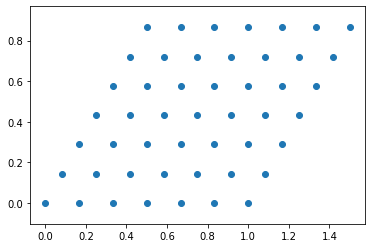

In [5]:
N = 0.2
plt.scatter(*np.split(Mesh(N)._vertices,2,axis=1))
plt.axis('equal');

In [6]:
mesh = Mesh(3)
mesh._vertices

array([[0.       , 0.       ],
       [0.5      , 0.8660254],
       [1.       , 0.       ],
       [1.5      , 0.8660254]])

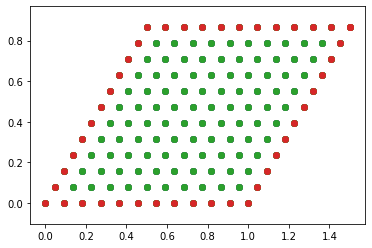

In [7]:
N=0.1
mesh = Mesh(N)
vertices = mesh._vertices
elements = mesh._elements
plt.axis('equal');
for k in range(2*mesh.number_of_divisions**2):
    plt.scatter(*np.split(vertices, 2, axis=1))
    plt.scatter(*np.split(vertices[mesh._get_parallelogram_boundary()], 2, axis=1))

In [8]:
%%capture
camera = Camera(plt.figure())
N=0.1
mesh = Mesh(N)

for k in range(2*mesh.number_of_divisions**2):
    plt.scatter(*np.split(mesh._vertices,2,axis=1,),color="blue")
    plt.scatter(*np.split(mesh._vertices[mesh._elements[k]],2,axis=1),color="red")
    plt.axis('equal');
    camera.snap()
anim = camera.animate(blit=True)
clear_output()


In [9]:
HTML(anim.to_html5_video())

In [ ]:
   def get_face_sample(face, vertices,M):
        """
        computes sample points for a specific face
        """
        _sample = np.random.uniform(size=(M,2))

        temp = _sample[1 - _sample[:,0] < _sample[:,1],:]

        vec_1=np.array([-1,1])
        vec_1=vec_1/np.linalg.norm(vec_1)

        vec_2=np.array([1,1])
        vec_2=vec_2/np.linalg.norm(vec_2)

        temp = np.dot((temp - 0.5), vec_1).reshape(-1,1)*vec_1.reshape(1,-1) - np.dot((temp - 0.5), vec_2).reshape(-1,1)*vec_2.reshape(1,-1)+0.5

        _sample[1 - _sample[:,0] < _sample[:,1],:] = temp
        return face[0,:] + np.matmul(_sample, np.stack([face[1]-face[0],face[2]-face[0]]))

In [ ]:
def integrate_face(f, face, vertices, M):
    face = vertices[face]
    sample = get_face_sample(face, vertices, M)
    vec = np.zeros(shape=(3,1))
    vec[K,0]=1
    a = np.squeeze(np.linalg.solve(np.concatenate([face, np.ones(shape=(3,1))],axis=1), vec))
    g = lambda x: a[2] + np.matmul(x, a[:2].reshape(2, 1))
    return np.sum(np.multiply(f(sample),g(sample).T))/M

In [ ]:
integrate_face(f, get_faces(N)[90], vertices, 10000)

In [ ]:
get_faces(N)[0]

In [ ]:
vertices = generate_vertices(N)
faces= get_faces(N)
face=vertices[faces[0]]

In [ ]:
tt=get_face_sample(face, vertices,5)
plt.scatter(tt[:,0],tt[:,1])
plt.scatter(face[:,0],face[:,1])
plt.axis('equal');

In [ ]:
_sample = np.random.uniform(size=(100,2))

temp = _sample[1 - _sample[:,0] < _sample[:,1],:]

vec_1=np.array([-1,1])
vec_1=vec_1/np.linalg.norm(vec_1)

vec_2=np.array([1,1])
vec_2=vec_2/np.linalg.norm(vec_2)

temp = np.dot((temp - 0.5), vec_1).reshape(-1,1)*vec_1.reshape(1,-1) - np.dot((temp - 0.5), vec_2).reshape(-1,1)*vec_2.reshape(1,-1)+0.5

_sample[1 - _sample[:,0] < _sample[:,1],:] = temp